In [7]:
from netCDF4 import Dataset
import numpy as np

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [9]:
nc = Dataset('../../measurements/bathymetry/erie_lld.grd')

In [ ]:
# topo = -nc.variables['z'][:] #[::10,::10]
# x = nc.variables['x'][:] #[::10]
# y = nc.variables['y'][:] #[::10]
# lon_0 = x.mean()
# lat_0 = y.mean()
# lon, lat = np.meshgrid(x, y)
m = Basemap(width=5000000*2*0.8,height=300000*0.8, resolution='h',projection='stere',lat_0=lat_0+0.2,lon_0=lat_0-0.2)
# x, y = m(lon, lat)

In [14]:
import cmocean

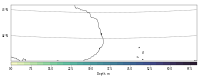

In [15]:
# 


levels1 = np.linspace(0,70,14*2+1)
levels2 = np.linspace(0,70,14+1)
# levels2 = np.linspace(-10,0,14*2+1)
plt.figure(figsize=(12,6), dpi=20)

# m.shadedrelief()
# m.drawstates()
# m.drawrivers()
m.drawcoastlines()
m.drawparallels(np.arange(41., 44, 1.),labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-84., -78., 1.),labels=[0,0,1,0], fontsize=10)
# cs = m.pcolor(x,y,np.squeeze(topo), cmap=cmocean.cm.deep)
# ax.set_ylim(*[41,43])
cax = m.contourf(x,y,topo, levels=levels1,cmap=cmocean.cm.deep)
plt.contour(x,y,topo, levels=levels1, colors='k')  # negative contours will be dashed by default
                 
# c = m.contourf(x,y,topo, levels=levels2,cmap=cmocean.cm.solar)
cbar = m.colorbar(cax,location='bottom')

# cbar = m.colorbar(cs, location='bottom')
cbar.set_label('Depth, m')
plt.show()
# plt.savefig('Bathymetry.png')


In [7]:
lat_0

42.0

In [8]:
lon_0

-81.0

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
import gdal

In [14]:


# raster = gdal.Open('ice/grid2011/g20110202.ct')
# band = raster.GetRasterBand(1)
# array = band.ReadAsArray()
# plt.imshow(array)

AttributeError: 'NoneType' object has no attribute 'GetRasterBand'

In [15]:
c={}
import numpy as np
from osgeo import gdal
ds = gdal.Open("../../measurements/bathymetry/central.tif")
x = np.array(ds.GetRasterBand(1).ReadAsArray())
pos = x[x>0]
for d in np.linspace(0,64.5,65/0.5):
    neg = x[x<-d]
    c[d] = -neg.sum(axis=0)/0.5
c

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


{0.0: 91595744.0,
 0.5: 91590576.0,
 1.0: 91569136.0,
 1.5: 91551384.0,
 2.0: 91529728.0,
 2.5: 91504920.0,
 3.0: 91475160.0,
 3.5: 91438176.0,
 4.0: 91395456.0,
 4.5: 91344384.0,
 5.0: 91280944.0,
 5.5: 91208088.0,
 6.0: 91106296.0,
 6.5: 90999264.0,
 7.0: 90847008.0,
 7.5: 90654912.0,
 8.0: 90435120.0,
 8.5: 90200832.0,
 9.0: 89880576.0,
 9.5: 89521496.0,
 10.0: 88979400.0,
 10.5: 88483912.0,
 11.0: 87634432.0,
 11.5: 86570672.0,
 12.0: 85193464.0,
 12.5: 83913632.0,
 13.0: 82309744.0,
 13.5: 80934392.0,
 14.0: 79251048.0,
 14.5: 77833640.0,
 15.0: 76432248.0,
 15.5: 74903264.0,
 16.0: 73270792.0,
 16.5: 71451760.0,
 17.0: 69314880.0,
 17.5: 66707092.0,
 18.0: 64211384.0,
 18.5: 61514864.0,
 19.0: 58156340.0,
 19.5: 52280204.0,
 20.0: 46895704.0,
 20.5: 39887812.0,
 21.0: 33338192.0,
 21.5: 20598596.0,
 22.0: 12724782.0,
 22.5: 10737733.0,
 23.0: 5283979.0,
 23.5: 4031520.0,
 24.0: 52864.1328125,
 24.5: 34660.23046875,
 25.0: 19105.09765625,
 25.5: 6217.869140625,
 26.0: -0.0,
 26.5:

In [17]:
depths[::-1]

NameError: name 'depths' is not defined

In [18]:
e_vol=np.array([])
import numpy as np
import gdal
ds = gdal.Open("../../measurements/bathymetry/erie_lld.tif")
x = np.array(ds.GetRasterBand(1).ReadAsArray())
pos = x[x>0]
neg = x[x<0]
e = neg.sum(axis=0)
depths = np.linspace(0,63,63.5/0.5)
prev_volume_below_d = 0
for d in depths:
    neg = x[x<=-d]+d
    e_vol = np.append(e_vol,  -neg.sum()*(111.32*0.85*0.0008333333*1000)**2 )
# e_vol = np.array(e_vol)[1:]-np.array(e_vol)[:-1]
# e_vol

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


In [ ]:
e_vol[0]/0.5*1e-9

In [21]:
e_vol.sum()*1e-9

10846.492564799159

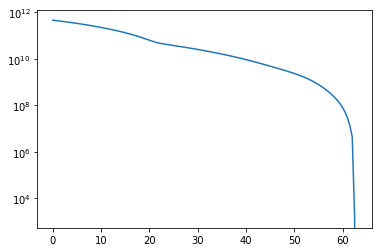

In [19]:
plt.semilogy(depths, e_vol) 

In [ ]:
plt.plot(depths[:-1], -np.diff(e_vol)/0.5)

### This is the volume of layers of lake Erie (eastern basin) with 0.5 step in depth np.linspace(0,63,63.5/0.5)

In [62]:
e_vol=np.array([])
import numpy as np
import gdal
ds = gdal.Open("../../measurements/bathymetry/western.tif")
x = np.array(ds.GetRasterBand(1).ReadAsArray())
pos = x[x>0]
neg = x[x<0]
e = neg.sum(axis=0)
depths = np.linspace(0,63.0,127)
prev_volume_below_d = 0
for d in depths:
    neg = x[x<=-d]+d
    e_vol = np.append(e_vol,  -neg.sum()*(111.32*0.85*0.0008333333*1000)**2 )
# e_vol = np.array(e_vol)[1:]-np.array(e_vol)[:-1]
# e_vol

In [110]:
(20/5787+290/6357+170/6237)/60/60/24/365*1e+9

0.10958974247024221

In [93]:
(e_vol[0]-e_vol[1])/0.5*1e-6

2745.1756228150402

In [100]:
290/0.0183

15846.994535519125

In [99]:
20/0.0074

2702.7027027027025

In [98]:
170/0.024

7083.333333333333

In [107]:
5780 + 6360 + 6240

18380

In [124]:
tau = 2.4
z_av = 19
sigma = 8/z_av
tau/(1 + tau*sigma)

1.1937172774869111

In [ ]:
tau = 2.4
z_av = 19
sigma = 8/z_av
TP = 

0.0902439024390244

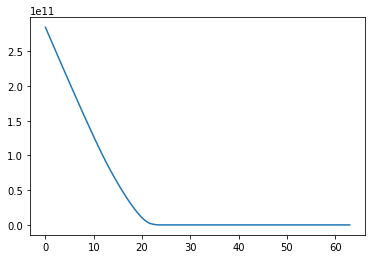

In [51]:
plt.plot(depths, e_vol)

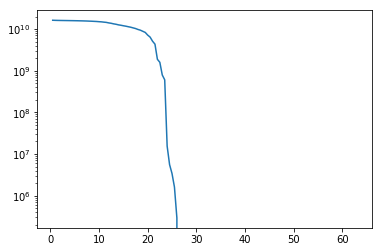

In [52]:
plt.semilogy(depths[1:], -np.diff(e_vol)/0.5 )

In [53]:
(-np.diff(e_vol)).sum()*1e-9

284.7521297217806

In [42]:
e_vol=np.array([])
import numpy as np
import gdal
ds = gdal.Open("../../measurements/bathymetry/western.tif")
x = np.array(ds.GetRasterBand(1).ReadAsArray())
pos = x[x>0]
neg = x[x<0]
e = neg.sum(axis=0)
depths = np.linspace(0,63.0,127)
prev_volume_below_d = 0
for d in depths:
    neg = x[x<-d]
    e_vol = np.append(e_vol,  -neg.sum(axis=0)*0.75*(111.32*0.0008333333*1000)**2 )
# e_vol = np.array(e_vol)[1:]-np.array(e_vol)[:-1]
# e_vol

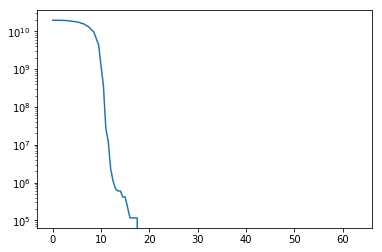

In [43]:
plt.semilogy(depths, e_vol)

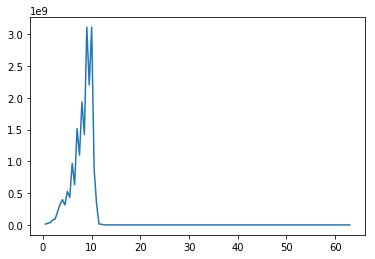

In [44]:
plt.plot(depths[1:], -np.diff(e_vol) )

In [ ]:
dataset = ds

In [ ]:
c+e+w

In [ ]:
import numpy as np
from osgeo import gdal
ds = gdal.Open("../../measurements/bathymetry/erie_lld.tif")
x = np.array(ds.GetRasterBand(1).ReadAsArray())
pos = x[x>0]
neg = x[x<0]
pos.sum(axis=0)
neg.sum(axis=0)

In [ ]:
(x<=0).sum()

In [ ]:
dataset=ds

In [ ]:
band = dataset.GetRasterBand(1)
print("Band Type={}".format(gdal.GetDataTypeName(band.DataType)))
      
min = band.GetMinimum()
max = band.GetMaximum()
if not min or not max:
    (min,max) = band.ComputeRasterMinMax(True)
print("Min={:.3f}, Max={:.3f}".format(min,max))
      
if band.GetOverviewCount() > 0:
    print("Band has {} overviews".format(band.GetOverviewCount()))
      
if band.GetRasterColorTable():
    print("Band has a color table with {} entries".format(band.GetRasterColorTable().GetCount()))

In [ ]:
print("Driver: {}/{}".format(dataset.GetDriver().ShortName,
                             dataset.GetDriver().LongName))
print("Size is {} x {} x {}".format(dataset.RasterXSize,
                                    dataset.RasterYSize,
                                    dataset.RasterCount))
print("Projection is {}".format(dataset.GetProjection()))
geotransform = dataset.GetGeoTransform()
if geotransform:
    print("Origin = ({}, {})".format(geotransform[0], geotransform[3]))
    print("Pixel Size = ({}, {})".format(geotransform[1], geotransform[5]))

In [ ]:
e*1e-9*0.75*(111.32*0.0008333333*1000)**2

In [ ]:
scanline = band.ReadRaster(xoff=0, yoff=0,
                           xsize=band.XSize, ysize=1,
                           buf_xsize=band.XSize, buf_ysize=1,
                           buf_type=gdal.GDT_Float32)

In [ ]:
import struct
tuple_of_floats = struct.unpack('f' * band.XSize, scanline)

In [ ]:
print('{:.8f}'.format((np.array(tuple_of_floats) - tuple_of_floats[0])[4]))

### Lake Ontario

In [ ]:
import numpy as np
from osgeo import gdal
ds = gdal.Open("../../measurements/bathymetry/ontario_lld.tif")
x = np.array(ds.GetRasterBand(1).ReadAsArray())
pos = x[x>0]
neg = x[x<0]
pos.sum(axis=0)
neg.sum(axis=0)

In [ ]:
dataset=ds

In [ ]:
band = dataset.GetRasterBand(1)
print("Band Type={}".format(gdal.GetDataTypeName(band.DataType)))
      
min = band.GetMinimum()
max = band.GetMaximum()
if not min or not max:
    (min,max) = band.ComputeRasterMinMax(True)
print("Min={:.3f}, Max={:.3f}".format(min,max))
      
if band.GetOverviewCount() > 0:
    print("Band has {} overviews".format(band.GetOverviewCount()))
      
if band.GetRasterColorTable():
    print("Band has a color table with {} entries".format(band.GetRasterColorTable().GetCount()))

In [ ]:
print("Driver: {}/{}".format(dataset.GetDriver().ShortName,
                             dataset.GetDriver().LongName))
print("Size is {} x {} x {}".format(dataset.RasterXSize,
                                    dataset.RasterYSize,
                                    dataset.RasterCount))
print("Projection is {}".format(dataset.GetProjection()))
geotransform = dataset.GetGeoTransform()
if geotransform:
    print("Origin = ({}, {})".format(geotransform[0], geotransform[3]))
    print("Pixel Size = ({}, {})".format(geotransform[1], geotransform[5]))

In [ ]:
e_vol=np.array([])
import numpy as np
import gdal
ds = gdal.Open("../../measurements/bathymetry/ontario_lld.grd")
x = np.array(ds.GetRasterBand(1).ReadAsArray())
pos = x[x>0]
neg = x[x<0]
depths = np.linspace(0,250,501)
for d in depths:
    neg = x[x<=-d]+d
    e_vol = np.append(e_vol,  -neg.sum()*(111.32*0.85*0.0008333333*1000)**2 )
# e_vol = np.array(e_vol)[1:]-np.array(e_vol)[:-1]
# e_vol

In [ ]:
-np.diff(e_vol)/0.5